# Association Rule Mining

# Content
* [Business Understanding](#business-understanding)
* [Data Understanding](#data-understanding)
    - [Part 1](#data-understanding-part1)
    - [Part 2](#data-understanding-part2)
* [Modeling Evaluation](#modeling-and-evaluation)
    - [1.Train and Adjust Parameters](#train-adjust)
    - [2.Evaluate and Compare](#evaluate-compare)
    - [3.Visualize Results](#visualize-results)
    - [4.Summarize Ramifications](#summarize-rammification)
* [Deployment](#deployment)
* [Exceptional Work](#exceptional-work)

# 1. Business Understanding  <a id='business-understanding'/>

## `Purpose of Data Selected`

We selected the hotel data set to investigate the associations for bookings that are canceled, the associations of booking city hotel vs a resort hotel, as well as what are the associations for an expensive vs inexpensive booking. To do so we will be exeucting an association rule learning alogirthm that could provide insights on what variables make it more likely for cancellaiton, which variables make it more likely for a customer to book a hotel in the city vs a resort hotel, and which variables make a booking more or less expensive for customer.

## `How will you measure the effectiveness of a good algorithm? `

We will be measuring the effectiveness of a rule by inspecting the confidence of each rule, or how likely is the the left hand side of the rule produced our desired right hand side. 

## `Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?`

Association rules is not a predictive rather inferential. There are not traditional validation techinques we can follow for the inferential analysis. We rather gather enough data and focus on the rules with **high support and high lift** to present most reasonal association.

# 2. Data Understanding <a id = 'data-understanding'/>

## Part 1 <a id ='data-understanding-part1'/>

### `Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file`
&emsp; The full description of the data can be found in https://www.sciencedirect.com/science/article/pii/S2352340918315191:


| Variable | Type | Description | Source/Engineering |
| --- | --- | --- | --- |
| ADR | Numeric | Average Daily Rate as defined by | BO, BL and TR / Calculated by dividing the sum of all lodging transactions by the total number of staying nights |
| Adults | Integer | Number of adults | BO and BL |
| Agent | Categorical | ID of the travel agency that made the bookinga | BO and BL |
| ArrivalDateDayOfMonth | Integer | Day of the month of the arrival date | BO and BL |
| ArrivalDateMonth | Categorical | Month of arrival date with 12 categories: “January” to “December”| BO and BL |
| ArrivalDateWeekNumber	| Integer | Week number of the arrival date | BO and BL |
| ArrivalDateYear | Integer | Year of arrival date | BO and BL |
| AssignedRoomType | Categorical | Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons | BO and BL |
| Babies | Integer | Number of babies | BO and BL |
| BookingChanges | Integer | Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation | BO and BL/Calculated by adding the number of unique iterations that change some of the booking attributes, namely: persons, arrival date, nights, reserved room type or meal |
| Children | Integer | Number of children | BO and BL/Sum of both payable and non-payable children |
| Company | Categorical | ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons	BO and BL. |
| Country | Categorical | Country of origin. Categories are represented in the ISO 3155–3:2013 format [6] | BO, BL and NT |
| CustomerType | Categorical | Type of booking, assuming one of four categories: <br> Contract - when the booking has an allotment or other type of contract associated to it; <br> Group – when the booking is associated to a group; <br> Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; <br> Transient-party – when the booking is transient, but is associated to at least other transient booking <br> | BO and BL |
| DaysInWaitingList | Integer | Number of days the booking was in the waiting list before it was confirmed to the customer | BO/Calculated by subtracting the date the booking was confirmed to the customer from the date the booking entered on the PMS |
| DepositType | Categorical | Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: <br> No Deposit – no deposit was made; <br> Non Refund – a deposit was made in the value of the total stay cost; <br> Refundable – a deposit was made with a value under the total cost of stay. | BO and TR/Value calculated based on the payments identified for the booking in the transaction (TR) table before the booking׳s arrival or cancellation date. |
| DistributionChannel | Categorical | Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and DC |
| IsCanceled | Categorical | Value indicating if the booking was canceled (1) or not (0) | BO |
| IsRepeatedGuest | Categorical | Value indicating if the booking name was from a repeated guest (1) or not (0) | BO, BL and C/ Variable created by verifying if a profile was associated with the booking customer. If so, and if the customer profile creation date was prior to the creation date for the booking on the PMS database it was assumed the booking was from a repeated guest |
| LeadTime | Integer | Number of days that elapsed between the entering date of the booking into the PMS and the arrival date | BO and BL/ Subtraction of the entering date from the arrival date |
| MarketSegment | Categorical | Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators” | BO, BL and MS |
| Meal | Categorical | Type of meal booked. | Categories are presented in standard hospitality meal packages: <br> Undefined/SC – no meal package; <br> BB – Bed & Breakfast; <br> HB – Half board (breakfast and one other meal – usually dinner); <br> FB – Full board (breakfast, lunch and dinner) | BO, BL and ML |
| PreviousBookingsNotCanceled | Integer | Number of previous bookings not cancelled by the customer prior to the current booking | BO and BL / In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and not canceled. |
| PreviousCancellations | Integer | Number of previous bookings that were cancelled by the customer prior to the current booking | BO and BL/ In case there was no customer profile associated with the booking, the value is set to 0. Otherwise, the value is the number of bookings with the same customer profile created before the current booking and canceled. |
| RequiredCardParkingSpaces | Integer | Number of car parking spaces required by the customer | BO and BL |
| ReservationStatus | Categorical | Reservation last status, assuming one of three categories: <br> Canceled – booking was canceled by the customer; <br> Check-Out – customer has checked in but already departed; <br> No-Show – customer did not check-in and did inform the hotel of the reason why | BO |
| ReservationStatusDate | Date | Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel | BO |
| ReservedRoomType | Categorical | Code of room type reserved. Code is presented instead of designation for anonymity reasons | BO and BL |
| StaysInWeekendNights | Integer | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel | BO and BL/ Calculated by counting the number of weekend nights from the total number of nights |
| StaysInWeekNights | Integer | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel | BO and BL/Calculated by counting the number of week nights from the total number of nights |
| TotalOfSpecialRequests | Integer | Number of special requests made by the customer (e.g. twin bed or high floor) | BO and BL/Sum of all special requests |
<br>





#### `Loading Library`

In [1]:
library(dplyr)
library(arules)
library(arulesViz)
library(RColorBrewer)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘arules’

The following object is masked from ‘package:dplyr’:

    recode

The following objects are masked from ‘package:base’:

    abbreviate, write

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


#### `Loading Data`

In [2]:
bookings=read.csv("https://raw.githubusercontent.com/olmosjorge28/DS7331_ML1_ASSINGMENTS/main/hotel_bookings.csv")
# bookings

### `Verify data quality`

#### `Missing values?`
Upon initial inspection of the 31 attributes, we noticed the following,
1. Total of 7 attributes appears to have some missing data.
We decided to replace the missing value “__nan__ and “__Undefined__” with __MODE__ as they appear to be accidental
2. We decided to __remove__ “__agent__”, "__country__", "__meal__", “__company__”, and "__reservation_status"__ attributes as they do not provide any valuable information for analysis
3. We classify the non-categorical attributes that are above and below 1.5 times the interquartile range of the dataset as __outliers__. 

Below is a list of all the attributes with missing values and the counts:
* children- 4
* market_segment - 2
* distribution_channel – 5

There's an association between the distribution channel type and the agent and company attributes. 
1. If the distribution channel is from a Traveling Agent (__TA__) or Tour Operator (__TO__), then the agency company is supplied in the agent column. 
2. if the distribution channel is __Corporate__, then the company associated with the booking is populated under the company attribute. 
3. If the distribution is neither __Corporate__, __TA__ or __TO__ than both the __agent and company__ attributes will be __null__. 
4. For the meal attribute during our data investigation, we have found out that '__Undefined__' and '__SC__' are synonymous so we have decided to __replace__ '__Undefined__' with '__SC__'. 


To simplify our data exploration, we decided to __remove__ the __agent, country, meal, reservation_status, and company__ attributes as they don't provide any additional information beyond what already is provided in the distribution channel. For missing values in __children, market_segment, and distribution_channel__, we removed those rows as the number of missing values are very small.
Data cleaning for the above attributes will be followed. 

In [3]:
bookings <- subset(bookings, select = -c(agent, country,company,meal,arrival_date_week_number, reservation_status, reservation_status_date))

#### `Outliers`
##### Outlier removal
- First we decided to take a look the simple statistics of the continuous variables to see if they make sense. 
- __adr__ and __lead_time__ had minimum and maximum values that appear as data entry error.  
- __stays_in_week_nights__ and __stays_in_weekend_nights__ had too extreme maximum values when there are only seven days in a week. 
- __days_in_waiting_list__, __total_of_special_requests__ and __required_car_parking_spaces__ had reasonable data distribution. 
- After determining that the 4 continuous features(adr, lead_time, stays_week_nights, stays_weekend_nights) have extreme outliers, the 25% and 75% interquartile range (IQR) was utilized in order to identify and remove the outliers from the dataset. 
- Outliers that are positioned at above and below the 1.5 times the upper and lower limit of IQR are removed

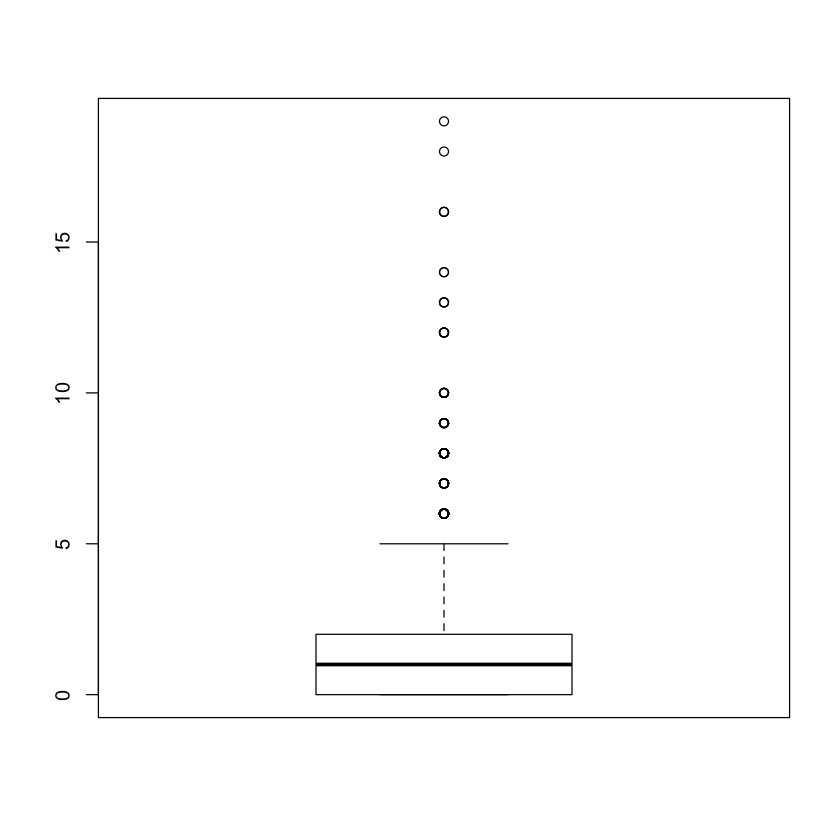

[1] 265

[1] 3354

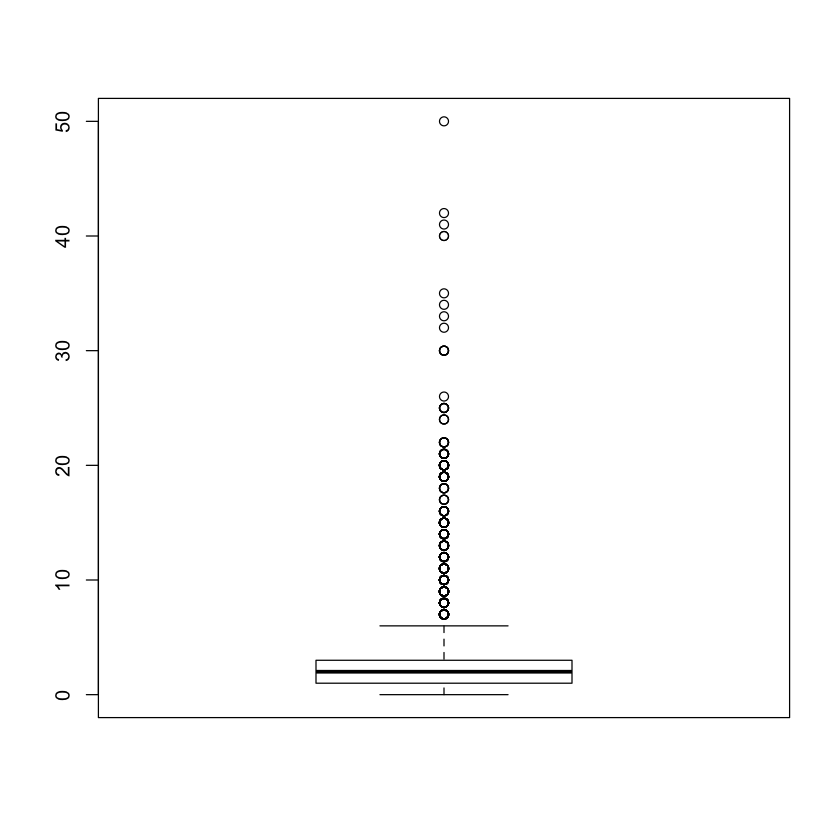

In [4]:
###################### Outliers ###########################
# Boxplot of stays_in_weekend_nights and stays_in_week_nights
boxplot(bookings$stays_in_weekend_nights) # Very skewed
boxplot(bookings$stays_in_week_nights)  # Very skewed


# Identifying outliers in stays_in_weekend_nights, stays_in_week 
outliers1 <- boxplot(bookings$stays_in_weekend_nights, plot=FALSE)$out
outliers2 <- boxplot(bookings$stays_in_week_nights, plot=FALSE)$out
outliers3 <- boxplot(bookings$adr, plot=FALSE)$out
outliers4 <- boxplot(bookings$lead_time, plot=FALSE)$out

length(outliers1) # Total of 265 outliers identified
length(outliers2)

bookings<- bookings[-which(bookings$stays_in_weekend_nights %in% outliers1),]
bookings<- bookings[-which(bookings$stays_in_week_nights %in% outliers2),]
bookings<- bookings[-which(bookings$adr %in% outliers3),]
bookings<- bookings[-which(bookings$lead_time %in% outliers4),]

#### `Variable Imputation`
- For ADR and lead_time, we converted them from continuous variables to categorical variables by assigning them into three bins of equal quartiles. 

In [5]:
summary(bookings$adr)

#low_bookings <- bookings %>% filter(bookings$adr == "Low")

#head(bookings)
#summ_adr <- summary(bookings$adr)
summ_adr <- quantile(bookings$adr, c(.33, .66))
#summ_lead_time <- summary(bookings$lead_time)
summ_lead_time <- quantile(bookings$lead_time, c(.33, .66))

#summ_stays_in_weeks <- summary(bookings$stays_in_weeks)
#summ_adr
adr_breaks = c(-Inf, summ_adr['33%'],summ_adr['66%'],Inf )
lead_time_breaks = c(-Inf,summ_lead_time['33%'], summ_lead_time['66%'], Inf)
#stays_in_weaks_breaks = c(-Inf,summ_stays_in_weeks['1st Qu.'], summ_stays_in_weeks['3rd Qu.'], Inf)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -6.38   69.50   93.60   97.64  122.50  211.03 

   #### `Variable Imputation - Part 2`
   - We converted the binary values of __is_canceled and is_repeated_guest__ into "Yes" and "No" to ease our analysis.
   - We converted __stays_in_week_nights and total_of_special_requests__ into categorical variables. 
   - We converted date variables such as arrival_date_month to season and arrival_date_day_of_month to the day of week.

In [6]:
################### Changing binary values to Yes and No #####################
bookings$is_canceled <- ifelse(bookings$is_canceled == 1, "Yes", "No")
bookings$is_repeated_guest <- ifelse(bookings$is_repeated_guest == 1, "Yes", "No")


bookings <- discretizeDF(bookings, methods = list(
lead_time = list(method = "Fixed", breaks = lead_time_breaks, 
   labels = c("Low", "Medium", "High")),
 adr = list(method = "Fixed", breaks = adr_breaks , 
   labels = c("Low", "Medium", "High")),
 stays_in_week_nights = list(method = "frequency", breaks = 3, 
   labels = c("Low", "Medium", "High")),
 total_of_special_requests = list(method = "fixed", breaks = c(-Inf,0.5,Inf), 
   labels = c("No", "Yes"))
 ),
 default = list(method = "none")
 )



bookings$monthNum <- match(bookings$arrival_date_month, month.name)
bookings$fullDate <- as.Date(with(bookings, paste(arrival_date_year, monthNum, arrival_date_day_of_month,sep="-")), "%Y-%m-%d")
bookings$weekday <- weekdays(bookings$fullDate)
bookings <- subset(bookings, select=-c(monthNum,fullDate,arrival_date_day_of_month))

# Assigning seasons to arrival_date_month
bookings <- bookings %>% 
mutate(arrival_date_month = case_when(
    arrival_date_month %in% c('December','January', 'February') ~ 'Winter',
    arrival_date_month %in% c('March','April', 'May') ~ 'Spring',
    arrival_date_month %in% c( 'June','July','August') ~ 'Summer',
    arrival_date_month %in% c('September','October', 'November') ~ 'Fall'
    ))

bookings<-subset(bookings, select=-(arrival_date_year))

#### `Transaction Conversion`
- Since this is an association rule mining, we decided to convert the data into transaction. 

In [8]:
# Factoring the dataframe
index <- 1:ncol(bookings)
bookings[ , index] <- lapply(bookings[ , index], as.factor)
str(bookings)

trans <- as(bookings, "transactions") # now the transaction data is ready for analysis
trans

'data.frame':	109425 obs. of  24 variables:
 $ hotel                         : Factor w/ 2 levels "City Hotel","Resort Hotel": 2 2 2 2 2 2 2 2 2 2 ...
 $ is_canceled                   : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 2 2 2 ...
 $ lead_time                     : Factor w/ 3 levels "Low","Medium",..: 3 1 1 1 1 1 1 2 2 1 ...
 $ arrival_date_month            : Factor w/ 4 levels "Fall","Spring",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ stays_in_weekend_nights       : Factor w/ 5 levels "0","1","2","3",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ stays_in_week_nights          : Factor w/ 3 levels "Low","Medium",..: 1 1 1 2 2 2 2 3 3 3 ...
 $ adults                        : Factor w/ 14 levels "0","1","2","3",..: 3 2 2 3 3 3 3 3 3 3 ...
 $ children                      : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ babies                        : Factor w/ 5 levels "0","1","2","9",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ market_segment                : Factor w/ 8 levels "Aviation","Complementa

transactions in sparse format with
 109425 transactions (rows) and
 332 items (columns)

## Part 2 <a id ='data-understanding-part2'/>

#### `Most Frequent Items`

Here with this the most frequent item plot, we were able to identify several key trends in hotel bookings. The most frequent item was babies=0 as most people will have difficulty travelling with their babies or children (top 7 in the list). Days in waiting list, previous bookings not canceled, is repeated guest were the next highest.  Guests were not repeated as there are many new travelers as validated by high rate of no previous cancellations(Top 5).

At the same time, marketing and advertisement can be more directed and targeted towards groups with no babies or children (i.e. just married couple, old couple ) and this will boost the profits in the areas with low rate of bookings.

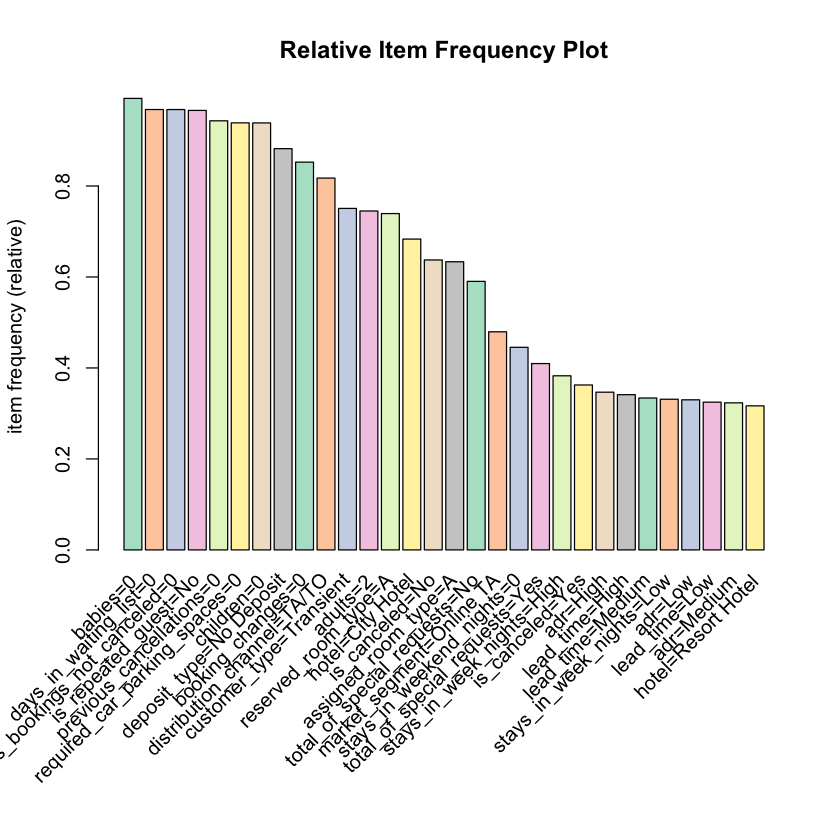

In [9]:
itemFrequencyPlot(trans,topN=30,type="relative",col=brewer.pal(8,'Pastel2'), main="Relative Item Frequency Plot")

#### `Market Segment`

Market segmentation involves analyzing the target markets for the hotel industry and segmenting them based on the pricing sensitivity and booking behaviors. Understanding market segment is very important part of understanding customer needs and it leads to better insights and predictibility of the model.

Online tour agents heavily accounted for the market segment. They were more than double the number of offline TA/TO, which was the second largest market segment. We will delve into this attribute in relation to other key attributes(For example, it is assumed that online/offline Tour agents have better ADR than other market segments due to their ability to book in bulk.)

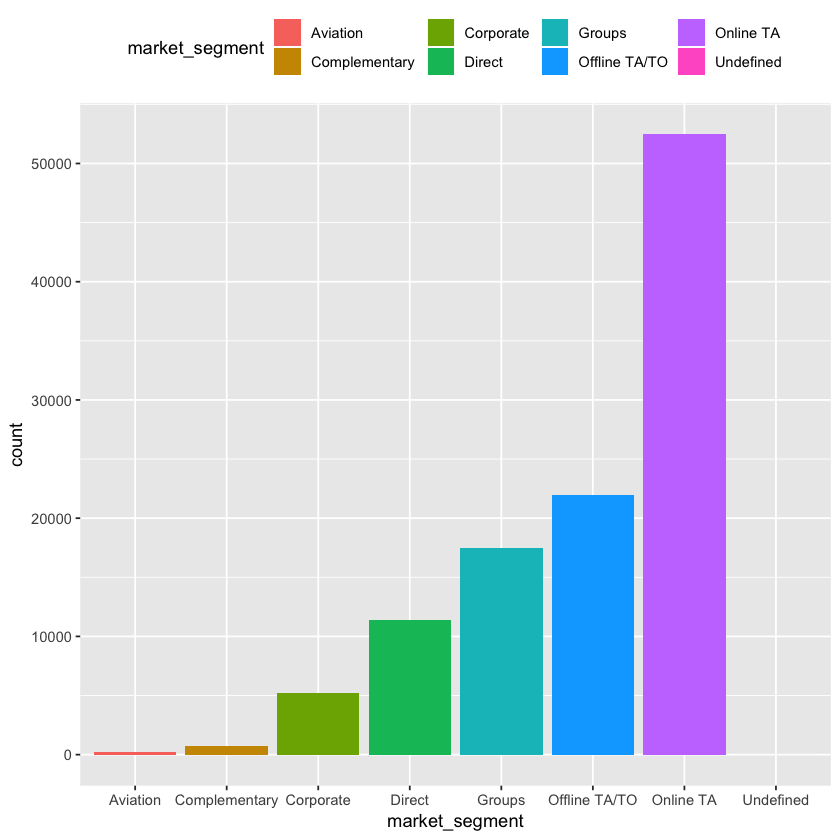

In [10]:
g <- ggplot(bookings, aes(market_segment))
g + geom_bar(aes(fill=market_segment)) + theme(legend.position = "top")

#### `Customer Type`

Customer Type is type of booking with four categories.
 - Contract: when the booking has an allotment or other type of contract associated to it
 - Group: when the booking is associated to a group
 - Transient: when the booking is not part of a group or contract, and is not associated to other transient booking
 - Transient-party: when the booking is transient, but is associated to at least other transient booking

We focused on the customer type in order to understand which attributes of the hotel and its booking characteristics related to the each customer. Transient party guests usually are short-term stay with less than 10 nights and are the most dominant customer type. It is a bit surprisng to see the group and contract category being not as outstanding given that the dominant market segment for tour agents.

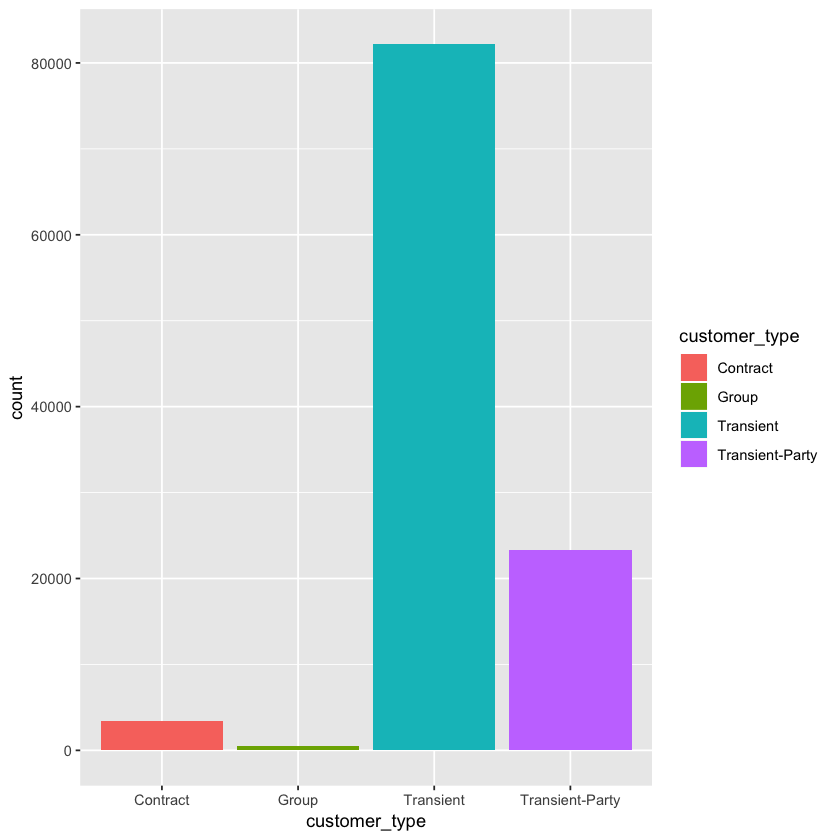

In [11]:
g <- ggplot(bookings, aes(customer_type))
g + geom_bar(aes(fill=customer_type))

#### `Seasonality`

Since Apriori needs a categorical data and we need seasonal information rather than time series data for understanding the association, we have converted our month data into the seasonality. For every quarter, we divided up into the season. During the peak seaon, summer, there are much greater numbers of high adr. And during off-season, winter, there are more number of low adr.

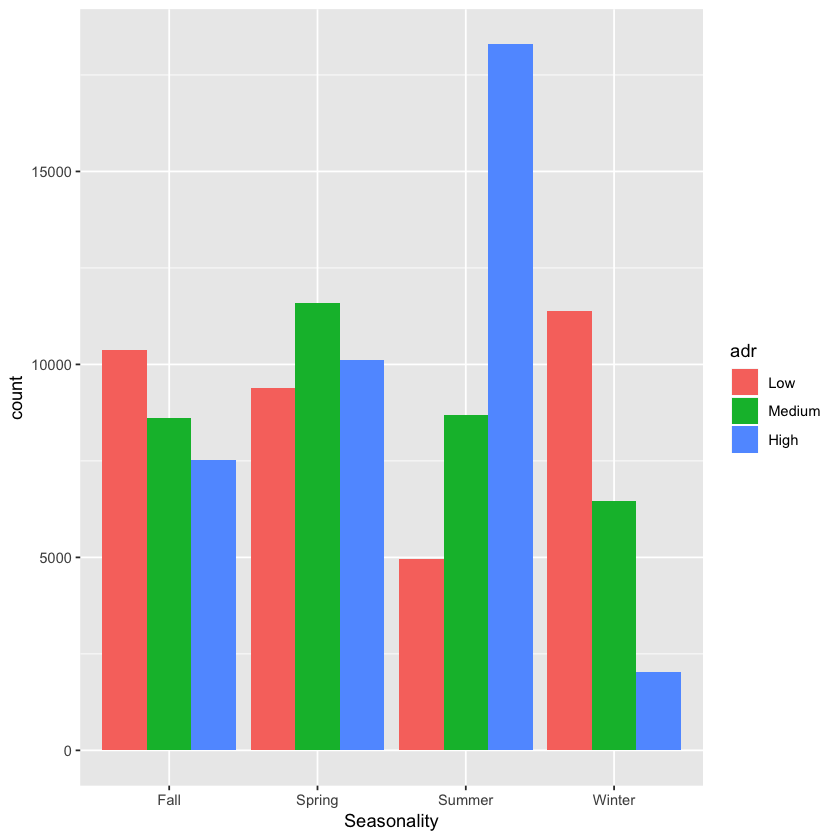

In [12]:
g <- ggplot(bookings, aes(arrival_date_month))
g + geom_bar(aes(fill=adr), position = "dodge") + xlab("Seasonality")

#### `Day of the Week`

Since we need a categorical variable for the apriori, we converted the arrival_date_of_month into the day of the week. With weekday conversion, we can look for the association of weekday to the target variables, such as ADR or Cancellation. From the below bar chart, there are more number of booking during Thursday and Friday. Both numbers of medium and high adr booking are lowest at Thursday, and they gradually increases untill Friday then it decreases untill Sunday.

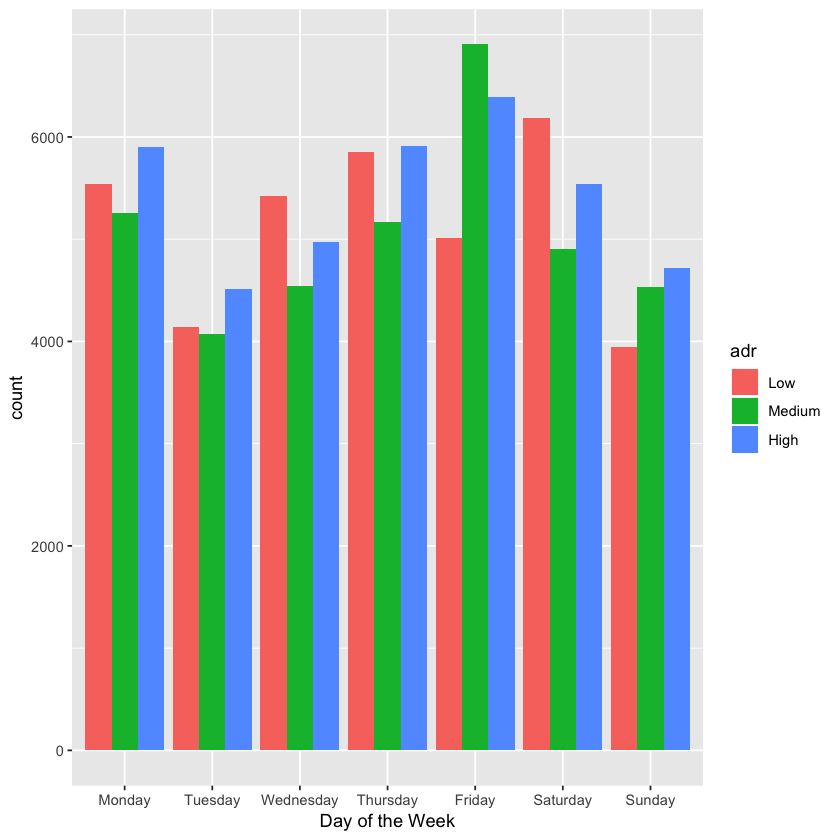

In [13]:
level_order <- c('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')
g <- ggplot(bookings, aes(factor(weekday, level = level_order)))
g + geom_bar(aes(fill=adr), position = "dodge") + xlab("Day of the Week")

#### `ADR and Cancellation`

Two of another key features is ADR and is_cancellation which we can look into the assocation to these two targets from other attributes. We can see there are more number of non cancellation than the cancelled booking. Also we can see that there are more number of Low ADR on non-canceled booking and there are more number of medium and high ADR on canceled booking.

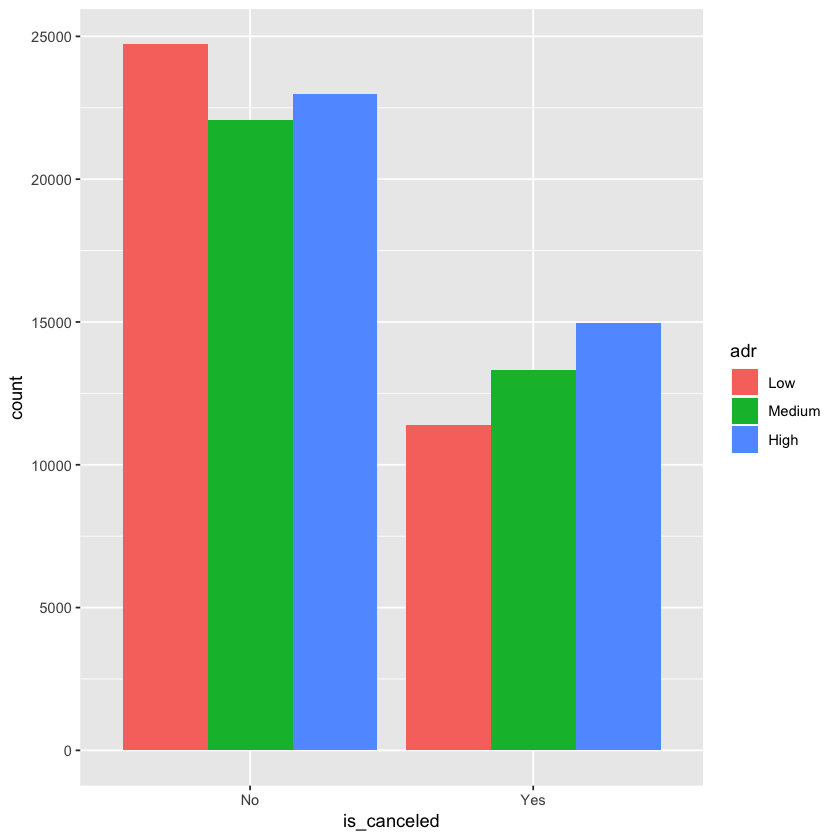

In [14]:
g <- ggplot(bookings, aes(is_canceled))
g + geom_bar(aes(fill = adr), position='dodge')

# 3. Modeling and Evaluation <a id='modeling-and-evaluation'/>

## Train and adjust parameters<a id='train-adjust'/>
- We identified the minimum and maximum length of the items were between 2 and 5 based on numerous trial runs.
- Support is set between 0.01 and 0.1 due to high number of the transaction data recordings. 
- Confidence is set between 0.9 and 0.99 based on numerous trial runs. 

## Rules for LHS (All the variables) vs RHS(ADR)

In [15]:
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.035, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"),default="lhs"))
rules_lift <- sort(rules, by="lift")
rules_pruned_adr <- rules_lift[!is.redundant(rules_lift, measure="lift")]
summary(rules_pruned_adr)

inspect(rules_pruned_adr,by="lift")

set of 13 rules

rule length distribution (lhs + rhs):sizes
 4  5 
 2 11 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.846   5.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03504   Min.   :0.9059   Min.   :0.03831   Min.   :2.636  
 1st Qu.:0.03517   1st Qu.:0.9091   1st Qu.:0.03847   1st Qu.:2.640  
 Median :0.04079   Median :0.9146   Median :0.04457   Median :2.755  
 Mean   :0.03921   Mean   :0.9133   Mean   :0.04293   Mean   :2.727  
 3rd Qu.:0.04271   3rd Qu.:0.9153   3rd Qu.:0.04683   3rd Qu.:2.773  
 Max.   :0.04331   Max.   :0.9208   Max.   :0.04764   Max.   :2.791  
     count     
 Min.   :3834  
 1st Qu.:3848  
 Median :4463  
 Mean   :4291  
 3rd Qu.:4674  
 Max.   :4739  

mining info:
  data ntransactions support confidence
 trans        109425   0.035        0.9

     lhs                               rhs           support confidence   coverage     lift count
[1]  {hotel=Resort Hotel,                                                                        
      arrival_date_month=Winter,                                                                 
      previous_cancellations=0,                                                                  
      reserved_room_type=A}         => {adr=Low}  0.04250400  0.9208078 0.04615947 2.790655  4651
[2]  {hotel=Resort Hotel,                                                                        
      arrival_date_month=Winter,                                                                 
      reserved_room_type=A,                                                                      
      deposit_type=No Deposit}      => {adr=Low}  0.04096870  0.9192126 0.04456934 2.785821  4483
[3]  {hotel=Resort Hotel,                                                                        
      arrival_date_m

## Rules for LHS(All the variables) vs RHS(is_canceled)

In [30]:
rules <- apriori(trans,parameter=list(minlen=2, maxlen=6,support=.075, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("is_canceled=No","is_canceled=Yes"),default="lhs"))

rules_lift <- sort(rules, by="lift")
rules_pruned_cancel <- rules_lift[!is.redundant(rules_lift, measure="lift")]
summary(rules_pruned_cancel)

inspect(rules_pruned_cancel,by="lift")

set of 128 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
 1 13 47 67 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   5.000   4.406   5.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.07507   Min.   :0.9009   Min.   :0.07543   Min.   :1.413  
 1st Qu.:0.08969   1st Qu.:0.9942   1st Qu.:0.09049   1st Qu.:2.742  
 Median :0.10163   Median :0.9959   Median :0.10181   Median :2.747  
 Mean   :0.09980   Mean   :0.9946   Mean   :0.10034   Mean   :2.726  
 3rd Qu.:0.11294   3rd Qu.:0.9977   3rd Qu.:0.11363   3rd Qu.:2.752  
 Max.   :0.11565   Max.   :1.0000   Max.   :0.11649   Max.   :2.758  
     count      
 Min.   : 8215  
 1st Qu.: 9815  
 Median :11121  
 Mean   :10921  
 3rd Qu.:12359  
 Max.   :12655  

mining info:
  data ntransactions support confidence
 trans        109425   0.075        0.9

      lhs                                   rhs                  support confidence   coverage     lift count
[1]   {deposit_type=Non Refund,                                                                              
       customer_type=Transient}          => {is_canceled=Yes} 0.10158556  1.0000000 0.10158556 2.758034 11116
[2]   {hotel=City Hotel,                                                                                     
       children=0,                                                                                           
       distribution_channel=TA/TO,                                                                           
       deposit_type=Non Refund}          => {is_canceled=Yes} 0.09848755  0.9999072 0.09849669 2.757778 10777
[3]   {hotel=City Hotel,                                                                                     
       distribution_channel=TA/TO,                                                                           
       res

## Evaluate and Compare<a id='evaluate-compare'/>

#### `ADR Evaluation`

###### Low ADR

In [22]:
adr_low_rules <- subset(rules_pruned_adr, subset=rhs %pin% 'Low')
summary(adr_low_rules)

set of 9 rules

rule length distribution (lhs + rhs):sizes
4 5 
1 8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.889   5.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03634   Min.   :0.9059   Min.   :0.03972   Min.   :2.746  
 1st Qu.:0.04079   1st Qu.:0.9091   1st Qu.:0.04457   1st Qu.:2.755  
 Median :0.04250   Median :0.9122   Median :0.04616   Median :2.765  
 Mean   :0.04104   Mean   :0.9127   Mean   :0.04496   Mean   :2.766  
 3rd Qu.:0.04296   3rd Qu.:0.9170   3rd Qu.:0.04704   3rd Qu.:2.779  
 Max.   :0.04331   Max.   :0.9208   Max.   :0.04764   Max.   :2.791  
     count     
 Min.   :3977  
 1st Qu.:4463  
 Median :4651  
 Mean   :4490  
 3rd Qu.:4701  
 Max.   :4739  

mining info:
  data ntransactions support confidence
 trans        109425   0.035        0.9

In [23]:
inspect(adr_low_rules,by="lift")

    lhs                               rhs          support confidence   coverage     lift count
[1] {hotel=Resort Hotel,                                                                       
     arrival_date_month=Winter,                                                                
     previous_cancellations=0,                                                                 
     reserved_room_type=A}         => {adr=Low} 0.04250400  0.9208078 0.04615947 2.790655  4651
[2] {hotel=Resort Hotel,                                                                       
     arrival_date_month=Winter,                                                                
     reserved_room_type=A,                                                                     
     deposit_type=No Deposit}      => {adr=Low} 0.04096870  0.9192126 0.04456934 2.785821  4483
[3] {hotel=Resort Hotel,                                                                       
     arrival_date_month=Winter,         

#### Observation for low ADR rules
- The common denominators for the rules that fall under low ADR were __resort Hotel,arrival in the Winter season, and reserved room type A__. 
- The __lift__ for these rules was way over 1.0, which means that they are strongly associated with the ADR being __low__. 
- The mean of __Support__ and the __confidence__ were 0.041 and 0.9127 respectively. Our transaction data has over 110,000 recordings and thus confidence was a more reliable source for our analytics. 

###### High ADR

In [24]:
adr_high_rules <- subset(rules_pruned_adr, subset=rhs %pin% 'High')
summary(adr_high_rules)

set of 4 rules

rule length distribution (lhs + rhs):sizes
4 5 
1 3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00    4.75    5.00    4.75    5.00    5.00 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03504   Min.   :0.9140   Min.   :0.03831   Min.   :2.636  
 1st Qu.:0.03507   1st Qu.:0.9145   1st Qu.:0.03834   1st Qu.:2.637  
 Median :0.03511   Median :0.9146   Median :0.03837   Median :2.638  
 Mean   :0.03511   Mean   :0.9146   Mean   :0.03838   Mean   :2.638  
 3rd Qu.:0.03515   3rd Qu.:0.9148   3rd Qu.:0.03842   3rd Qu.:2.638  
 Max.   :0.03517   Max.   :0.9153   Max.   :0.03847   Max.   :2.640  
     count     
 Min.   :3834  
 1st Qu.:3837  
 Median :3842  
 Mean   :3842  
 3rd Qu.:3846  
 Max.   :3848  

mining info:
  data ntransactions support confidence
 trans        109425   0.035        0.9

In [25]:
inspect(adr_high_rules,by="lift")

    lhs                            rhs           support confidence   coverage     lift count
[1] {arrival_date_month=Summer,                                                              
     market_segment=Online TA,                                                               
     reserved_room_type=D,                                                                   
     deposit_type=No Deposit}   => {adr=High} 0.03514736  0.9152784 0.03840073 2.639670  3846
[2] {arrival_date_month=Summer,                                                              
     market_segment=Online TA,                                                               
     previous_cancellations=0,                                                               
     reserved_room_type=D}      => {adr=High} 0.03507425  0.9146806 0.03834590 2.637946  3838
[3] {arrival_date_month=Summer,                                                              
     market_segment=Online TA,                              

#### Observation for high ADR rules
- The common denominators for the rules that fall under high ADR were __Summer,Online Tour agent, reserved room type D__. 
- The __lift__ for these rules was way over 1.0, which means that they are strongly associated with the ADR being __high__.
- The mean of __Support__ and the __confidence__ were 0.035 and 0.9146 respectively.

#### `Cancellation Evaluation`

###### Cancellation - No

In [31]:
canceled_no_rules <- subset(rules_pruned_cancel, subset=rhs %pin% 'No')
summary(canceled_no_rules)

set of 2 rules

rule length distribution (lhs + rhs):sizes
5 
2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      5       5       5       5       5       5 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.08583   Min.   :0.9009   Min.   :0.09527   Min.   :1.413  
 1st Qu.:0.08665   1st Qu.:0.9010   1st Qu.:0.09617   1st Qu.:1.414  
 Median :0.08746   Median :0.9011   Median :0.09706   Median :1.414  
 Mean   :0.08746   Mean   :0.9011   Mean   :0.09706   Mean   :1.414  
 3rd Qu.:0.08828   3rd Qu.:0.9012   3rd Qu.:0.09796   3rd Qu.:1.414  
 Max.   :0.08909   Max.   :0.9013   Max.   :0.09885   Max.   :1.414  
     count     
 Min.   :9392  
 1st Qu.:9481  
 Median :9570  
 Mean   :9570  
 3rd Qu.:9660  
 Max.   :9749  

mining info:
  data ntransactions support confidence
 trans        109425   0.075        0.9

In [32]:
inspect(canceled_no_rules,by="lift")

    lhs                           rhs                 support confidence   coverage     lift count
[1] {lead_time=Low,                                                                               
     deposit_type=No Deposit,                                                                     
     customer_type=Transient,                                                                     
     adr=Low}                  => {is_canceled=No} 0.08909299  0.9012665 0.09885310 1.413922  9749
[2] {lead_time=Low,                                                                               
     previous_cancellations=0,                                                                    
     customer_type=Transient,                                                                     
     adr=Low}                  => {is_canceled=No} 0.08583048  0.9009113 0.09527073 1.413365  9392


#### Observation for no cancellation rules
- The common denominators for the rules that fall under no cancellation were __low lead time, customer type_Transient, and low ADR__. It appears that customers who are transient and are in a hurry paying low hotel ADR are not likely to cancel. 
- The __lift__ for these rules was over 1.0, which means that they are strongly associated with __not cancelling__.
- The mean of __Support__ and the __confidence__ were 0.087 and 0.9011 respectively. Our transaction data has over 110,000 recordings and thus confidence was a more reliable source for our analytics. 

###### Cancellation - Yes

In [33]:
canceled_yes_rules <- subset(rules_pruned_cancel, subset=rhs %pin% 'Yes')
summary(canceled_yes_rules)

set of 126 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
 1 13 47 65 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   4.000   5.000   4.397   5.000   5.000 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.07507   Min.   :0.9928   Min.   :0.07543   Min.   :2.738  
 1st Qu.:0.09008   1st Qu.:0.9942   1st Qu.:0.09045   1st Qu.:2.742  
 Median :0.10182   Median :0.9959   Median :0.10197   Median :2.747  
 Mean   :0.10000   Mean   :0.9961   Mean   :0.10040   Mean   :2.747  
 3rd Qu.:0.11294   3rd Qu.:0.9977   3rd Qu.:0.11364   3rd Qu.:2.752  
 Max.   :0.11565   Max.   :1.0000   Max.   :0.11649   Max.   :2.758  
     count      
 Min.   : 8215  
 1st Qu.: 9857  
 Median :11142  
 Mean   :10942  
 3rd Qu.:12359  
 Max.   :12655  

mining info:
  data ntransactions support confidence
 trans        109425   0.075        0.9

In [34]:
inspect(canceled_yes_rules,by="lift")

      lhs                                   rhs                  support confidence   coverage     lift count
[1]   {deposit_type=Non Refund,                                                                              
       customer_type=Transient}          => {is_canceled=Yes} 0.10158556  1.0000000 0.10158556 2.758034 11116
[2]   {hotel=City Hotel,                                                                                     
       children=0,                                                                                           
       distribution_channel=TA/TO,                                                                           
       deposit_type=Non Refund}          => {is_canceled=Yes} 0.09848755  0.9999072 0.09849669 2.757778 10777
[3]   {hotel=City Hotel,                                                                                     
       distribution_channel=TA/TO,                                                                           
       res

#### Observation for cancellation rules
- The common denominators for the rules that fall under cancellation were __no refund, city hotel, distribution channel Tour agent, and reserved room type A__. It appears that customers who place booking through tour agents/operators for city hotels are likely to cancel regardless of the refund policy.
- The __lift__ for these rules was over 1.0, which means that they are strongly associated with __cancelling__.
- The mean of __Support__ and the __confidence__ were 0.1 and 0.9961 respectively. These are higher than the those two metrics used for ADR. 

## Visualize Results<a id='visualize-results'/>

#### `ADR Plots`
- Two key, Grouped matrix, and graph plot are compared.

##### Two-key plot: 
   - uses support and confidence on x and y-axis respectively.
   - It uses order for coloring. The order is the number of items in the rule.
   - Hard to tell a pattern between two orders due to small number of rules.  

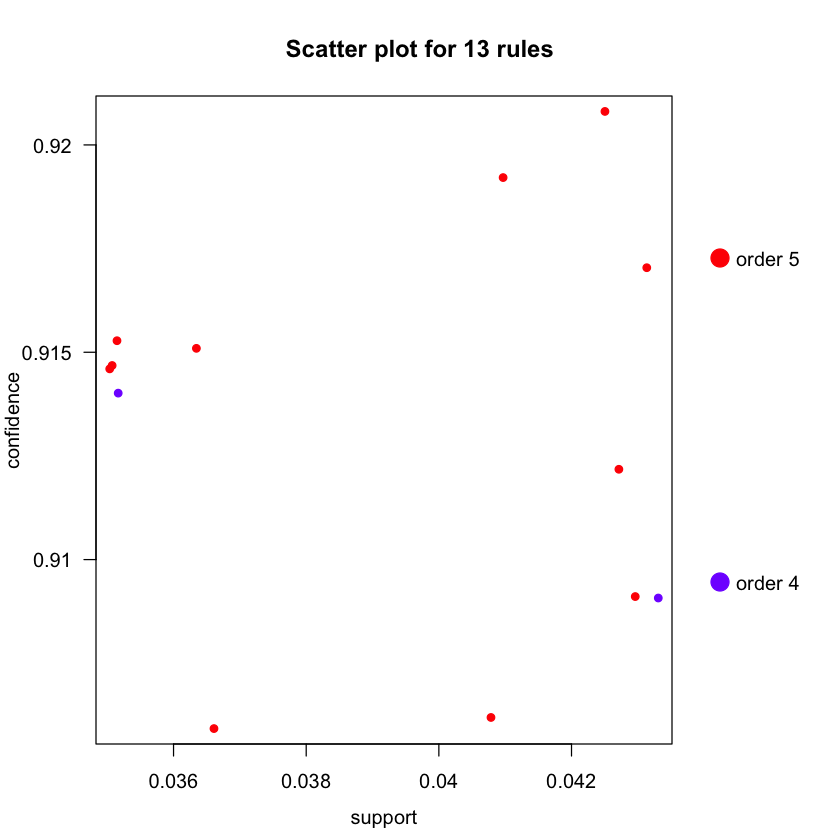

In [41]:
plot(rules_pruned_adr, method="two-key plot")

##### Grouped Matrix plot
   - Top 10 rules are highly associated with ADR=Low. 
   - __Winter__ , __children__ and __babies__  appears to be the highest correlated pair with the low ADR. 
   - __Winter__ is the most frquent item appearing across top 10 rules. 

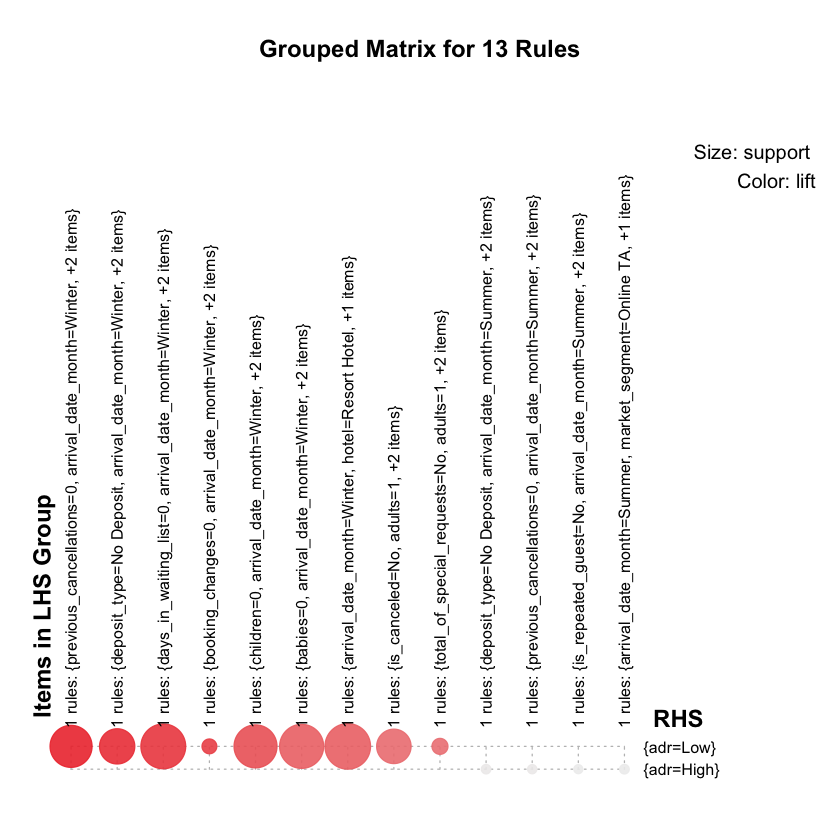

In [36]:
# Grouped matrix
plot(rules_pruned_adr, method="grouped matrix")

##### Graph plot 
- __Reserved room type=A, arriving in winter season, and Resort hotel__ are found to be the three most common denominators for the low ADR. 
- __Reserved room type=D, arriving in summer season, and booking through online Tour agent__ are found to be the three most common denominators for the high ADR. 

Warning message:
“Unknown control parameters: title”

Available control parameters (with default values):
main	 =  Graph for 10 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

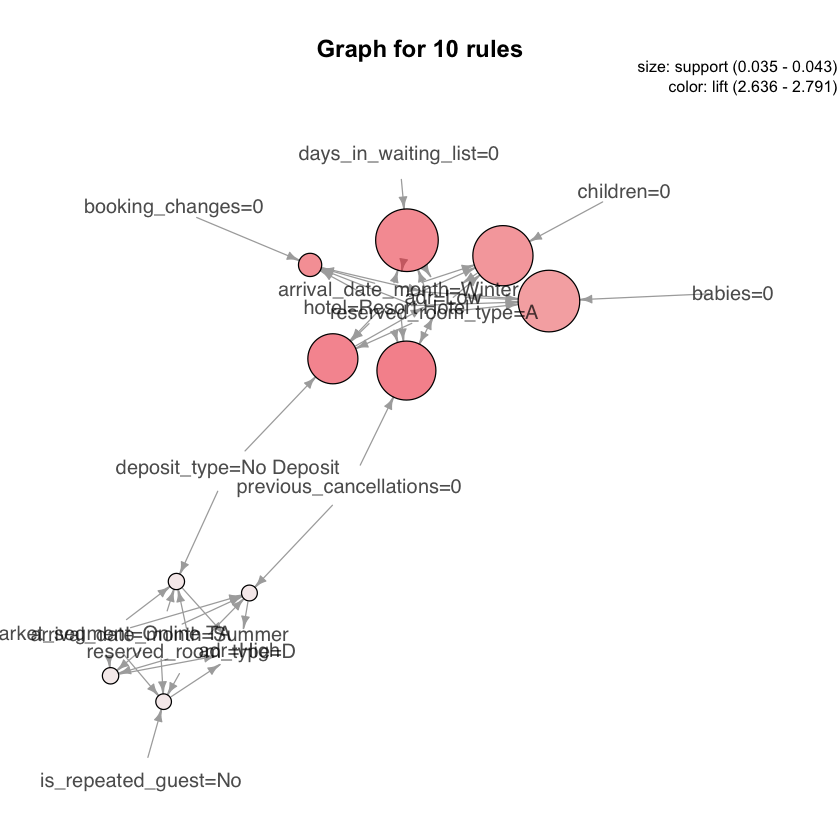

In [63]:
library(htmlwidgets)
library(IRdisplay)
library(plotly)

top10Rules <- head(rules_pruned_adr, n = 10, by = "confidence")
plot(top10Rules, method = "graph", title="Interactive plot")# Interactive plot
# p <- plot(top10Rules, method = "graph")
# p

#### `Cancellation Plots`

##### Two-key plot: 
   - uses support and confidence on x and y-axis respectively.
   - It uses order for coloring. The order is the number of items in the rule.
   - Lower the number of orders, higher both the support and confidence are. 

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


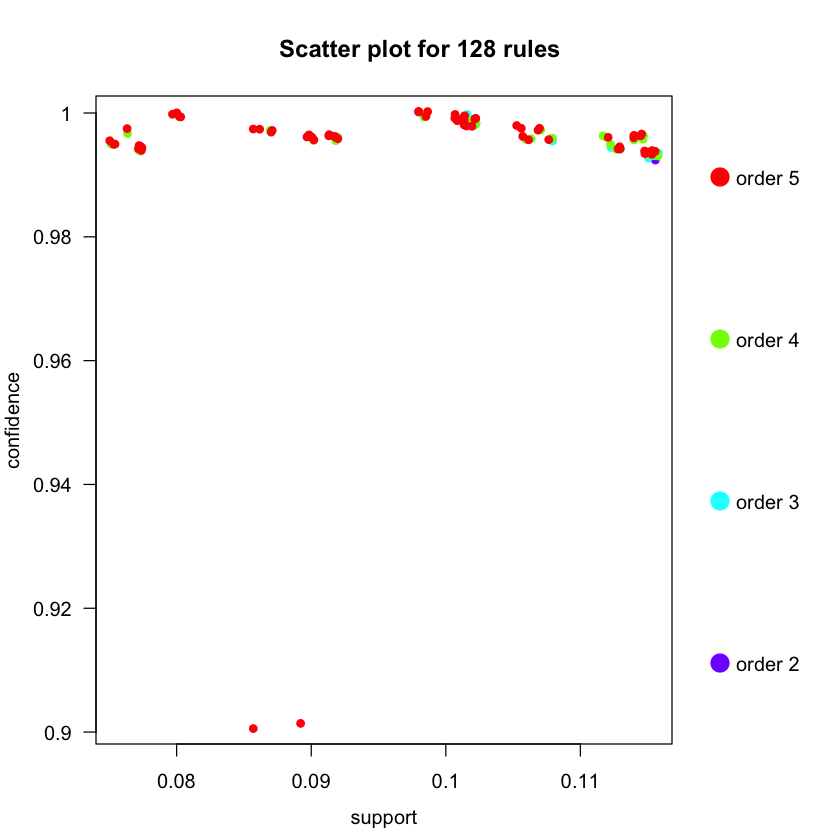

In [38]:
# The two-key plot uses support and confidence on x and y-axis respectively.
# It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned_cancel, method="two-key plot")

##### Grouped Matrix plot
   - The majority of the rules are highly associated with cancellation. 
   - The top rule suggested that __Transient customers who booked through tour agent/operator__ are highly likely to cancel. 
   - The bottom two matrix bubbles suggest that __low ADR and low lead time__ are contributing factors to not cancel. 

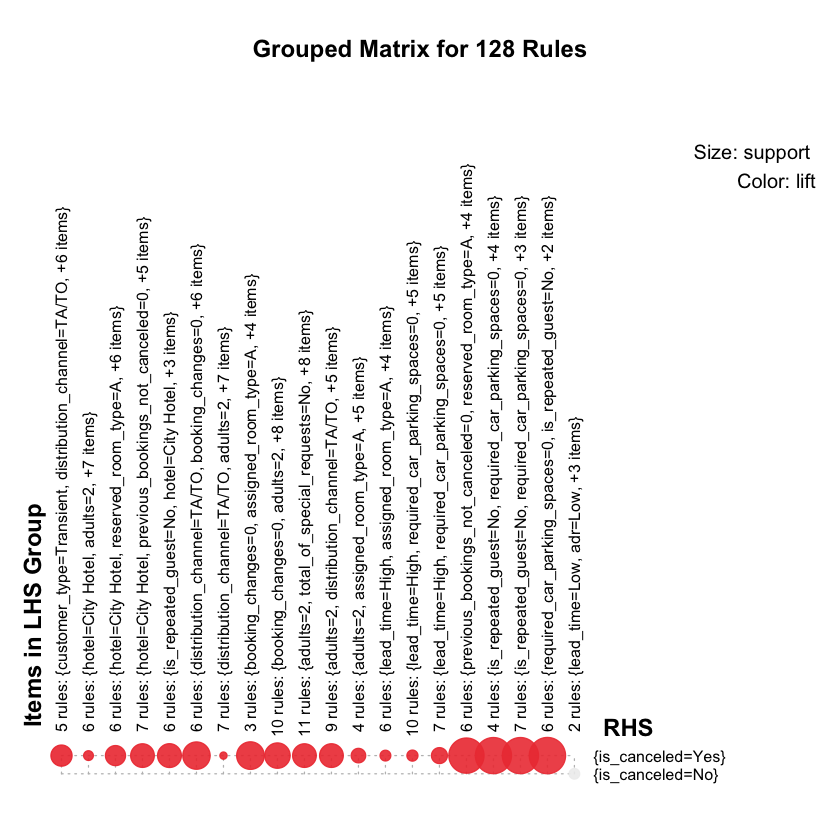

In [39]:
# Grouped plot
plot(rules_pruned_cancel, method="grouped matrix")

##### Graph plot 
- __Distribution channel of TA/TO, City hotel and Non refund__ are found to be the three most common denominators for the cancelling.  

Warning message:
“Unknown control parameters: title”

Available control parameters (with default values):
main	 =  Graph for 10 rules
max	 =  100
nodeCol	 =  c("#EE0000FF", "#EE0303FF", "#EE0606FF", "#EE0909FF", "#EE0C0CFF", "#EE0F0FFF", "#EE1212FF", "#EE1515FF", "#EE1818FF", "#EE1B1BFF", "#EE1E1EFF", "#EE2222FF", "#EE2525FF", "#EE2828FF", "#EE2B2BFF", "#EE2E2EFF", "#EE3131FF", "#EE3434FF", "#EE3737FF", "#EE3A3AFF", "#EE3D3DFF", "#EE4040FF", "#EE4444FF", "#EE4747FF", "#EE4A4AFF", "#EE4D4DFF", "#EE5050FF", "#EE5353FF", "#EE5656FF", "#EE5959FF", "#EE5C5CFF", "#EE5F5FFF", "#EE6262FF", "#EE6666FF", "#EE6969FF", "#EE6C6CFF", "#EE6F6FFF", "#EE7272FF", "#EE7575FF",  "#EE7878FF", "#EE7B7BFF", "#EE7E7EFF", "#EE8181FF", "#EE8484FF", "#EE8888FF", "#EE8B8BFF", "#EE8E8EFF", "#EE9191FF", "#EE9494FF", "#EE9797FF", "#EE9999FF", "#EE9B9BFF", "#EE9D9DFF", "#EE9F9FFF", "#EEA0A0FF", "#EEA2A2FF", "#EEA4A4FF", "#EEA5A5FF", "#EEA7A7FF", "#EEA9A9FF", "#EEABABFF", "#EEACACFF", "#EEAEAEFF", "#EEB0B0FF", "#EEB1B1FF", "#EEB3B3FF", "#EEB5B5FF", "#EEB7B7FF", "#EEB8B8F

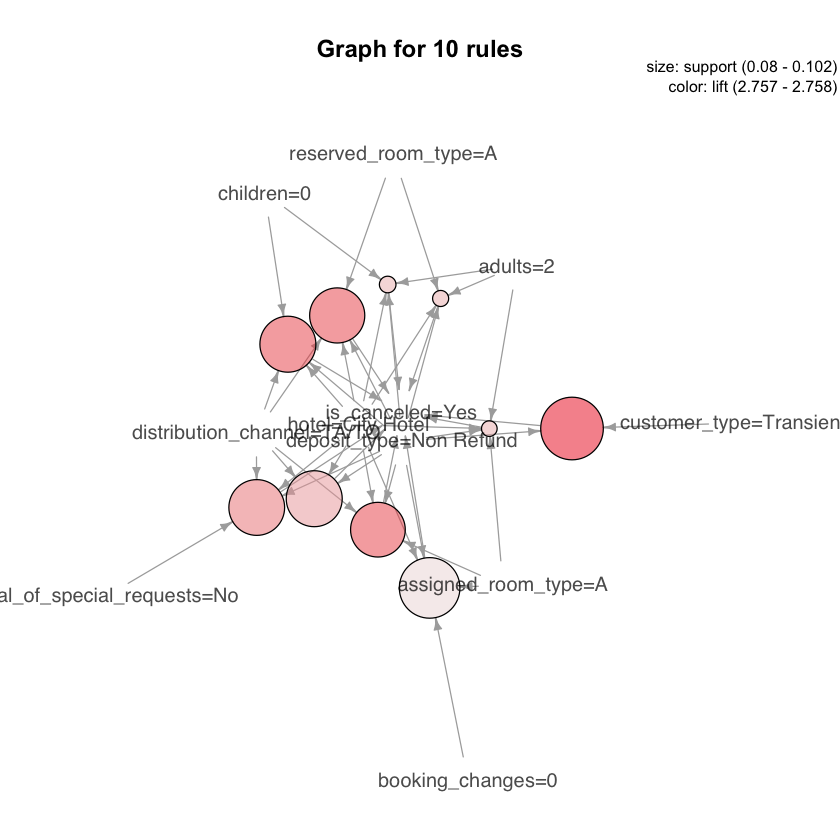

In [71]:
top10Rules <- head(rules_pruned_cancel, n = 10, by = "confidence")
plot(top10Rules, method = "graph", title="Interactive plot")# Interactive plot

## Summarize the Ramifications<a id='summarize-rammification'/>

#### ADR 
- The common denominators for the rules that fall under __low ADR__ were __resort Hotel,arrival in the Winter season, and reserved room type A__. The result for the metrics are as follows: __Lift__ :2.675 __Support__:0.041,  __confidence__ : 0.9127
- The common denominators for the rules that fall under __high ADR__ were __Summer,Online Tour agent, reserved room type D__.  The result for the metrics are as follows: __Lift__ :2.638,  __Support__:0.035,  __confidence__ : 0.9146

#### Cancellation
- The common denominators for the rules that fall under __no cancellation__ were __low lead time, customer type_Transient, and low ADR__. The result for the metrics are as follows: __Lift__ :1.414 __Support__:0.087,  __confidence__ : 0.9011.
- The common denominators for the rules that fall under __cancellation__ were __no refund, city hotel, distribution channel Tour agent, and reserved room type A__.The result for the metrics are as follows: __Lift__ :2.747 __Support__:0.1,  __confidence__ : 0.9961



### `Findings`
##### ADR 
- Cheap ADR is highly correlated with reserving room type A at a resort hotel during the winter season. This needs further investigation as inclusion of geographical factors such as ski resort during the winter season can make an impact to this study. 
- High ADR is highly correlated with reserving room type D during the summer by online tour agents. As people typically take vacations during the summer, it is expected to see hotel price surge during the summer. 

##### Cancellation
- Customers who are transient and like to not wait for a long time for their booking are more than likely to keep their reservations. Low ADR might be a contributing factor to it as well. 
- We did not expect to see the item "Non refund" as one of the most common item as we like to correlate easy refund policy with the likelihood of hotel cancellation. It is assumed that the tour agent has a flexible booking system that allows you to cancel especially with hotels that are located in the city area for corporate business/conference purposes.  

# 4. Deployment<a id='deployment'/>

##### `Did you achieve your goals? If not, can you reign in the utility of your modeling? `
- Our goal was to identify relationship of features to cancellation and ADR. We were able to identify common association between ADR of hotel booking and some features such as seasonality, reserved room type, market_segment, and hotel type. From the observation, we noticed the association for high adr related to peak season(summer) and booking by travel agent as well as bigger room size(reserved_room_type D). For low adr, the association are related to off season (winter) and booking for resort as well as smaller room size(reserved_room_type A). For High ADR, we noticed bookings are possibly targeted for tourists as bookings are made during peak season and through the travel agencies, which causes extra cost. 
- We were able to identify the association for non-canceled bookings. When lead time is low, booked by individuals, and adr is low, we have high confidence that the customer will not cancel the booking. However, identifying the association for canceled bookings proved to be more difficult. There was many repeated values on several features that let to high supports but not necessarily generate useful insights. 


##### `How useful is your model for interested parties (i.e., the companies or organizations that might want to use it?`
- ADR - The ADR association model is useful for customer to determine when the best time of year, to avoid using traveling agents, and to target smaller room size to adjust budget for their bookings.
- Cancellation - The cancellation association model is useful for hotel business that reveals that booking that come from travel agencies tends to have higher chances of cancellation. Hotels could work with travel agencies to come up with ways to reduce cancellation rate.


##### `How would your deploy your model for interested parties?`
We could use this model as part of booking recommendation to give insights on seasonal prices. And we know that bookings with low lead time tends to lower cancellation rate we could work with hotels to capitalize hotel vacancies to travelers needing immediate lodging. 

##### `What other data should be collected?`
 - Detail information about location of hotels
 - Transportation method of guests visiting hotels
 - International or local visitors

Additional information of guests types will help to identify the insight of cancellation behavior and the more insight of differences on hotel prices.


##### `How often would the model need to be updated, etc.?`
Ideal timeframe of model update should be yearly bases. Since the data is highly related with seasonal data, we required to collected enough data for each seasons.

# 5. Exceptional Work<a id='exceptional-work'/>
In our prior work, the results were partially limited in terms of fairly comparing all the classes of different variables. There were classes that were not addressed due to a certain class that had a high frequency than the other. We decided to delve into specific classes of each variables to figure out detailed associations for fair comparisons among different classes. The followings are our additional analysis. 

1. Compared Cancelled bookings vs Customer type(Transient)
2. Compared Cancelled bookings vs Customer type(Contract)
2. Compared Reservation type vs ADR

## Rules for LHS(Cancelled booking) vs RHS(customer_type - Transient Party(Family, friends))
- Observations from rules inspection
    - Common items : Stays in weekend nights, Market segment : groups, No deposit
- Two key plot
    - Pattern is not clear here as we don't have many data points. 
- Grouped matrix
    - It is assumed that the cancellations are mostly event-driven by transient people based on the associations we see with market segment that is targeted towards group events. The lead time is high meaning that the booking were placed ahead of ample amount of time to prepare for organized events such as wedding and family-oriented special events. 
- Parallel plot
    -  The width of the arrows represents support and the intensity of the color represent confidence. Rules with less items are shorter arrows
    - It shows that bookings that were initially placed over the weekend got cancelled on Saturday and this bookings had no deposit or were targeted toward groups.

     lhs                               rhs                                support confidence   coverage     lift count
[1]  {stays_in_weekend_nights=2,                                                                                      
      market_segment=Groups,                                                                                          
      previous_cancellations=1,                                                                                       
      deposit_type=No Deposit}      => {customer_type=Transient-Party} 0.01005671  1.0000000 0.01005671 6.580693   399
[2]  {stays_in_weekend_nights=2,                                                                                      
      market_segment=Groups,                                                                                          
      deposit_type=No Deposit,                                                                                        
      weekday=Saturday}             => {customer

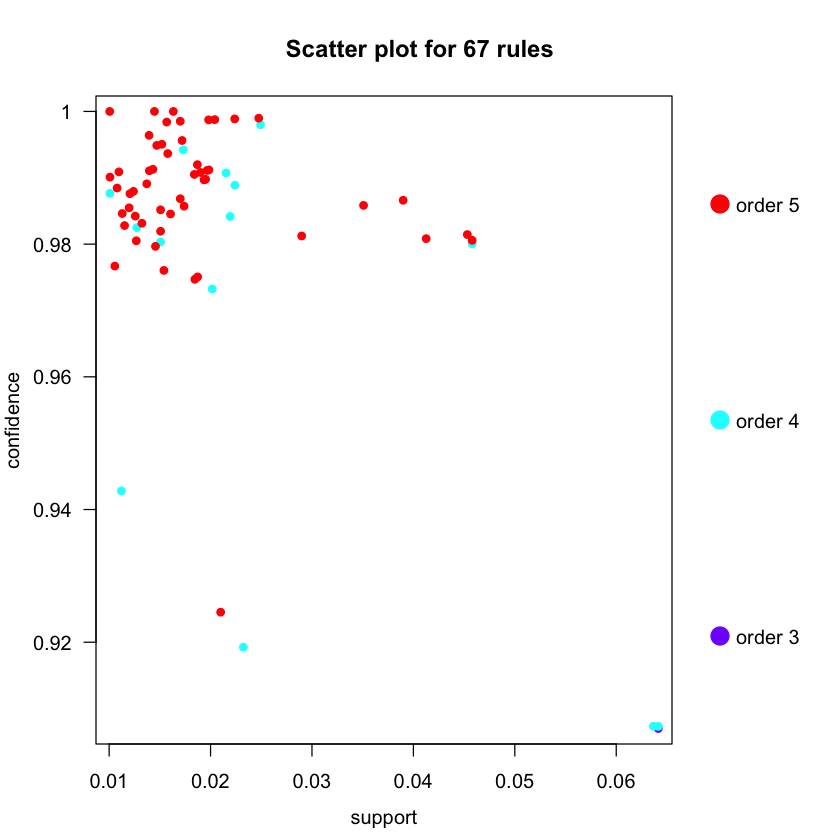

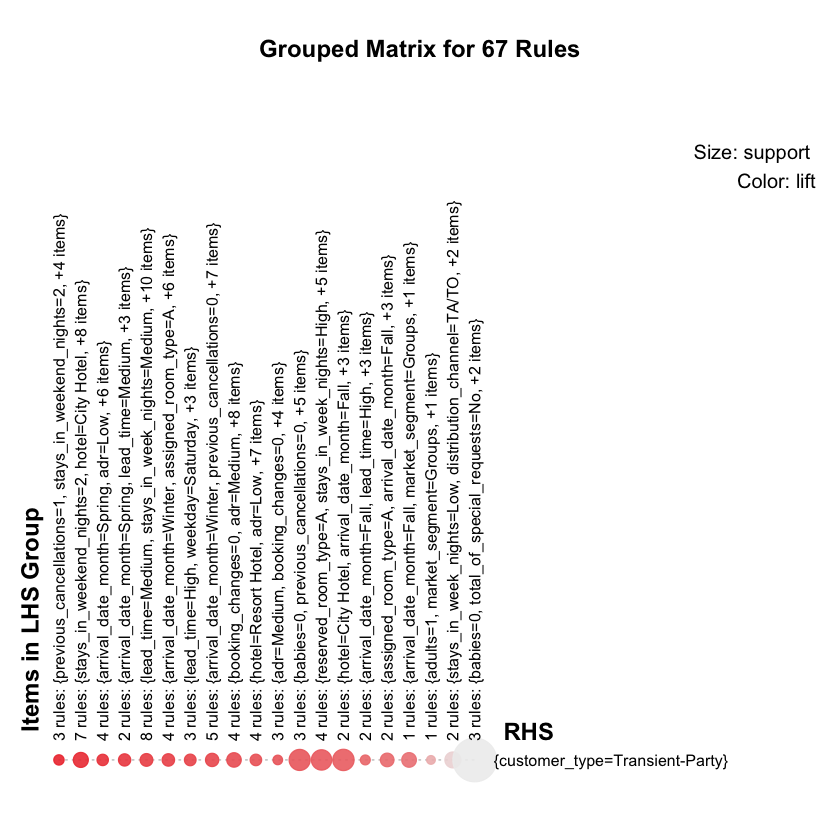

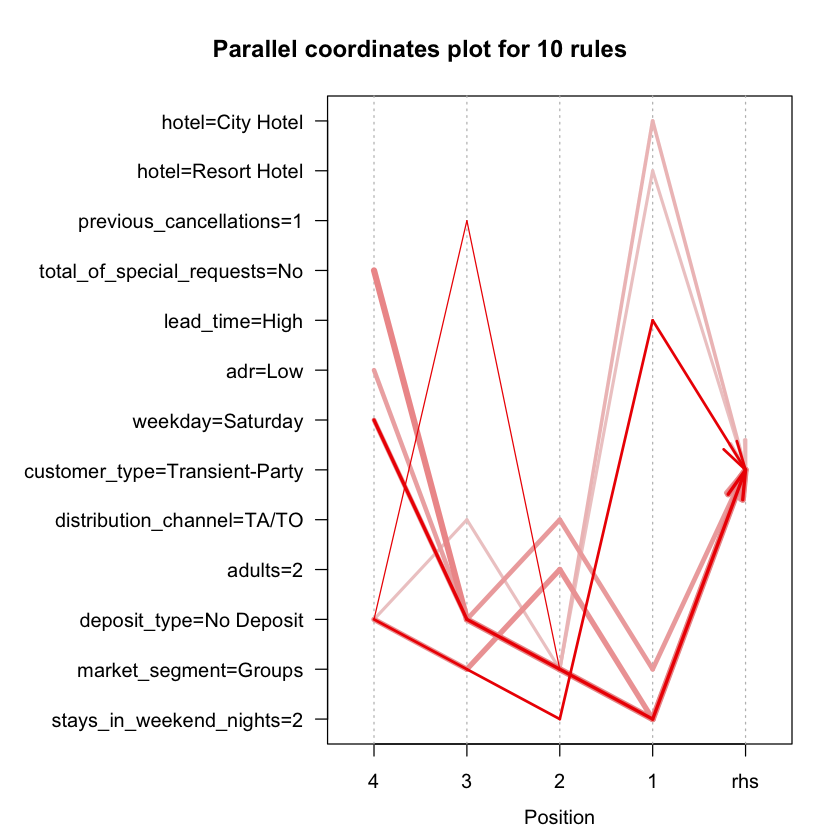

In [54]:
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.01, confidence=.9), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party"),default="lhs"))


rules_lift <- sort(rules, by="lift")

rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]


# Top 10 rules
top10Rules <- head(rules_pruned, n = 10, by = "confidence")


inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped matrix")
plot(top10Rules, method="paracoord", control = list(reorder = TRUE)) # Top 10 rules are used

## Rules for LHS(Cancelled bookings) vs RHS(customer_type - Contract (Company or Government))
- Observations from rules inspection 
    - Weekday of Monday and Thursday that the cancellations are taking place. 
    - The number of stays during the week is low 
- Two key plot
    - There is a slight evidence that the lower order shows higher support and higher confidence.  
- Grouped matrix
    - It appers that the bookings are cancelled mostly during the week either on Monday or Thursday. Since the customer type is contract and relatively short-term, it is assumed that bookings are related to business trip or layover. 
- Parallel plot
    -  The most prominent rule shows the cancellations are happening on Thursday and that these customers are not repeated guests(which makes sense for people who travel to different new places) and their bookings are no longer than a week at a time. 

set of 98 rules

rule length distribution (lhs + rhs):sizes
 4  5 
 4 94 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  4.000   5.000   5.000   4.959   5.000   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.006049   Min.   :0.5008   Min.   :0.006503   Min.   :17.41  
 1st Qu.:0.006925   1st Qu.:0.5122   1st Qu.:0.013006   1st Qu.:17.81  
 Median :0.008066   Median :0.5575   Median :0.013863   Median :19.39  
 Mean   :0.007701   Mean   :0.5658   Mean   :0.013716   Mean   :19.67  
 3rd Qu.:0.008116   3rd Qu.:0.5884   3rd Qu.:0.014468   3rd Qu.:20.46  
 Max.   :0.008645   Max.   :0.9302   Max.   :0.017215   Max.   :32.35  
     count      
 Min.   :240.0  
 1st Qu.:274.8  
 Median :320.0  
 Mean   :305.5  
 3rd Qu.:322.0  
 Max.   :343.0  

mining info:
         data ntransactions support confidence
 trans_cancel         39675   0.005        0.5

     lhs                                   rhs                          support confidence    coverage     lift count
[1]  {stays_in_week_nights=Medium,                                                                                   
      is_repeated_guest=No,                                                                                          
      previous_cancellations=1,                                                                                      
      weekday=Thursday}                 => {customer_type=Contract} 0.008115942  0.8609626 0.009426591 29.93750   322
[2]  {stays_in_week_nights=Low,                                                                                      
      market_segment=Groups,                                                                                         
      previous_cancellations=1,                                                                                      
      weekday=Monday}                   => {customer_typ

To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


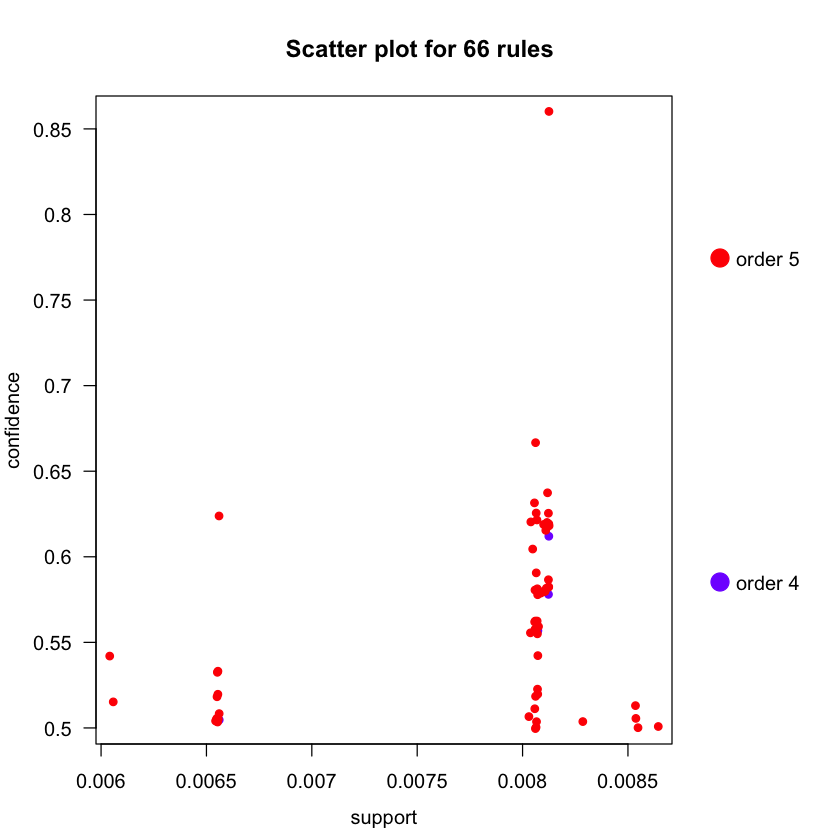

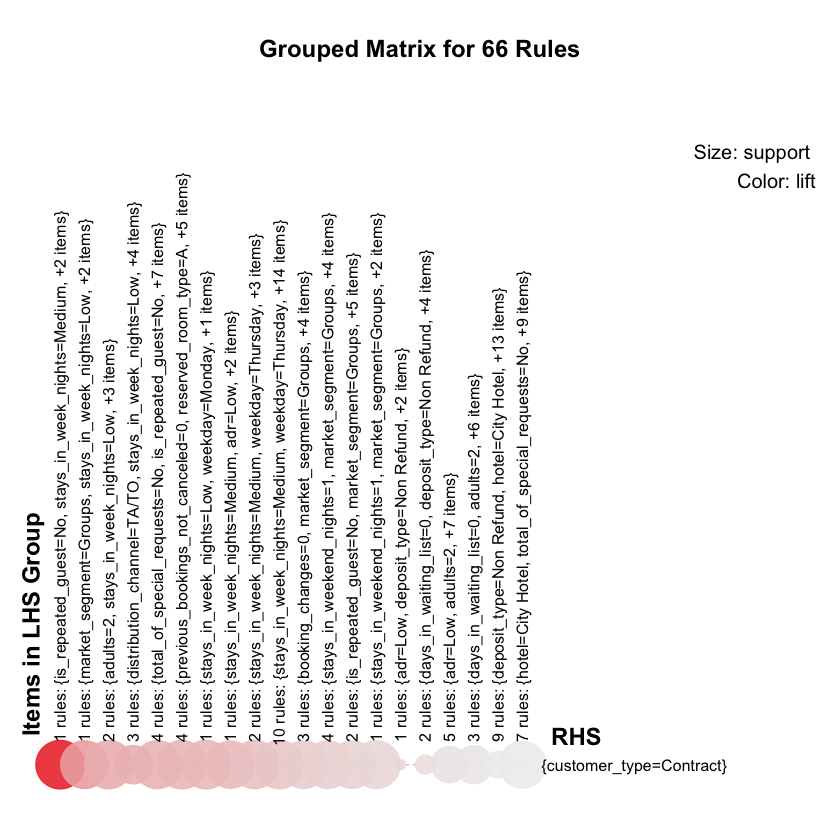

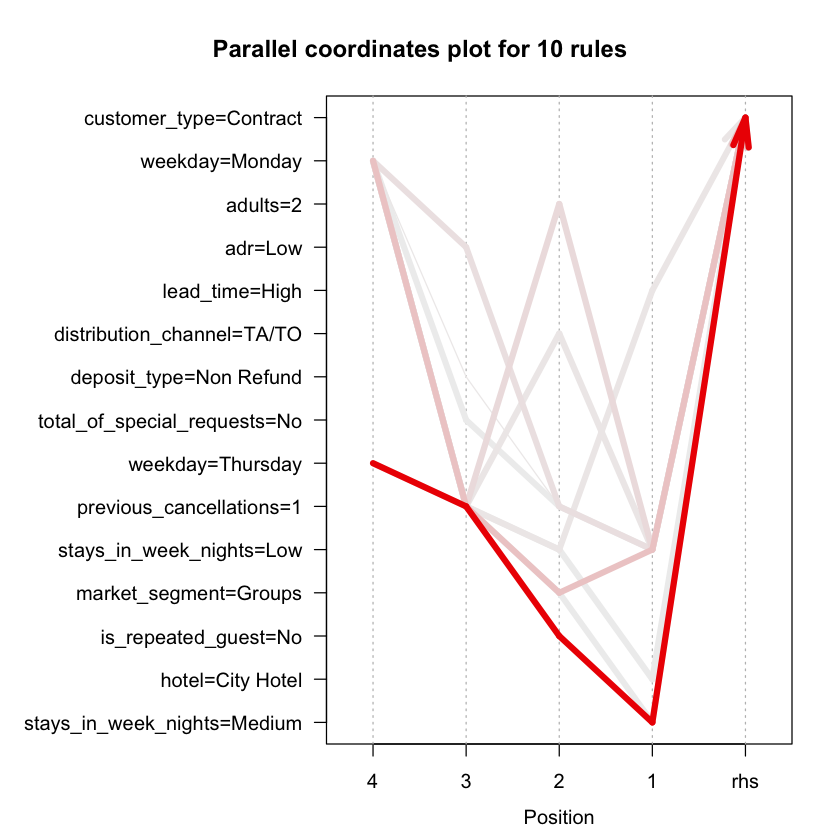

In [55]:
trans_cancel <- as(bookings[bookings$is_canceled == "Yes", ], "transactions")

rules <- apriori(trans_cancel,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.5), control = list(verbose=F),appearance = list(rhs=c("customer_type=Contract"),default="lhs"))

summary(rules)
rules_lift <- sort(rules, by="lift")
# plot(rules_lift, method="grouped matrix")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift>3 & quality(rules_pruned)$lift<30 ]

# Top 10 rules
top10Rules <- head(rules_pruned, n = 10, by = "confidence")


inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped matrix")
plot(top10Rules, method="paracoord", control = list(reorder = TRUE)) # Top 10 rules are used

## Rules for LHS(Reservation type) vs RHS(ADR)
- Observations from rules inspection 
    - For market_segment=Complimentary and customer type=transient, the ADR was low
    - For distribution type=Tour Agent and reserved room type=F, the ADR was high. 
- Two key plot
    - There is an evidence that the lower orders have higher support. 
- Grouped matrix
    - Market segment of complimentary targeted towards groups had low ADR. 
    - Bookings through tour agency and reserved room type of F had high ADR. 
- Parallel plot
    - A few prominent rules showed that transient customers that have complimentary market segments had low ADR. 
    - Contract bookings for groups at city hotel were also likely to have low ADR. 

set of 31 rules

rule length distribution (lhs + rhs):sizes
 2  3  4  5 
 1  7 15  8 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.000   3.500   4.000   3.968   4.500   5.000 

summary of quality measures:
    support           confidence        coverage             lift      
 Min.   :0.005026   Min.   :0.8668   Min.   :0.005045   Min.   :2.512  
 1st Qu.:0.006059   1st Qu.:0.8857   1st Qu.:0.006310   1st Qu.:2.665  
 Median :0.009431   Median :0.9339   Median :0.009806   Median :2.718  
 Mean   :0.010527   Mean   :0.9316   Mean   :0.011504   Mean   :2.762  
 3rd Qu.:0.013379   3rd Qu.:0.9829   3rd Qu.:0.014951   3rd Qu.:2.848  
 Max.   :0.024510   Max.   :0.9985   Max.   :0.028275   Max.   :3.026  
     count     
 Min.   : 550  
 1st Qu.: 663  
 Median :1032  
 Mean   :1152  
 3rd Qu.:1464  
 Max.   :2682  

mining info:
  data ntransactions support confidence
 trans        109425   0.005        0.7

     lhs                                 rhs            support confidence    coverage     lift count
[1]  {hotel=City Hotel,                                                                              
      market_segment=Groups,                                                                         
      customer_type=Contract}         => {adr=Low}  0.006031528  0.9984871 0.006040667 3.026075   660
[2]  {market_segment=Complementary,                                                                  
      distribution_channel=Direct,                                                                   
      customer_type=Transient}        => {adr=Low}  0.005026274  0.9963768 0.005044551 3.019679   550
[3]  {market_segment=Complementary,                                                                  
      distribution_channel=Direct}    => {adr=Low}  0.005199909  0.9947552 0.005227325 3.014765   569
[4]  {market_segment=Complementary,                                               

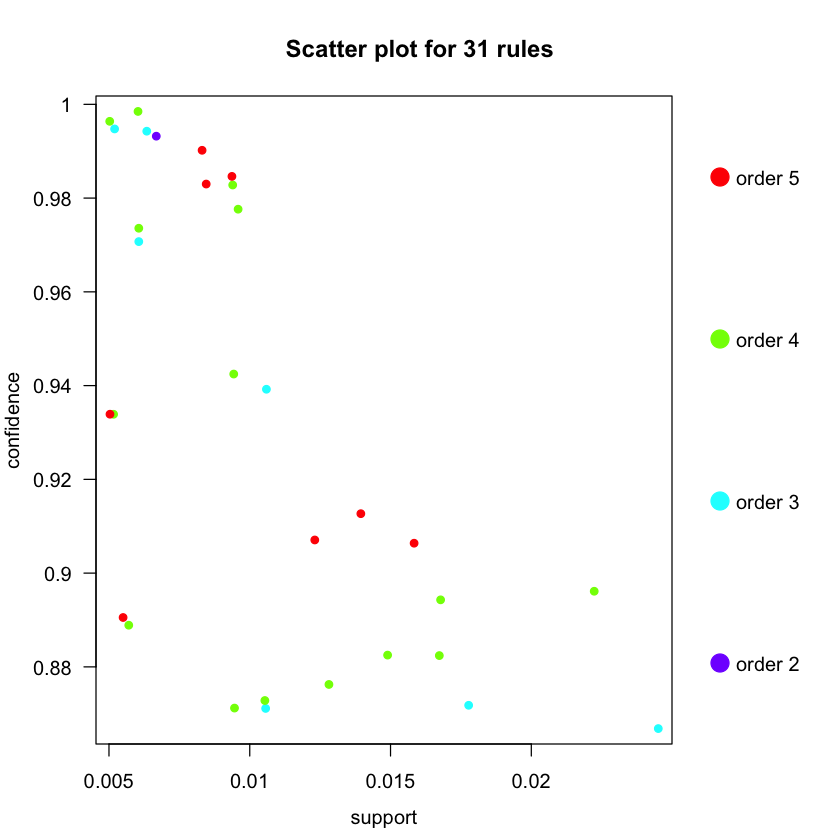

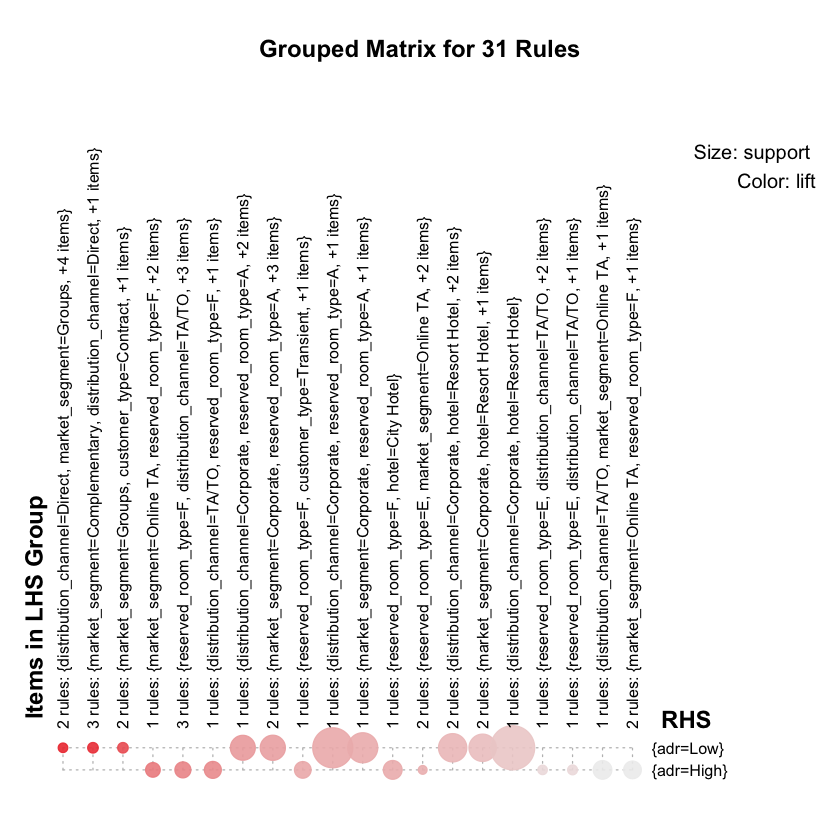

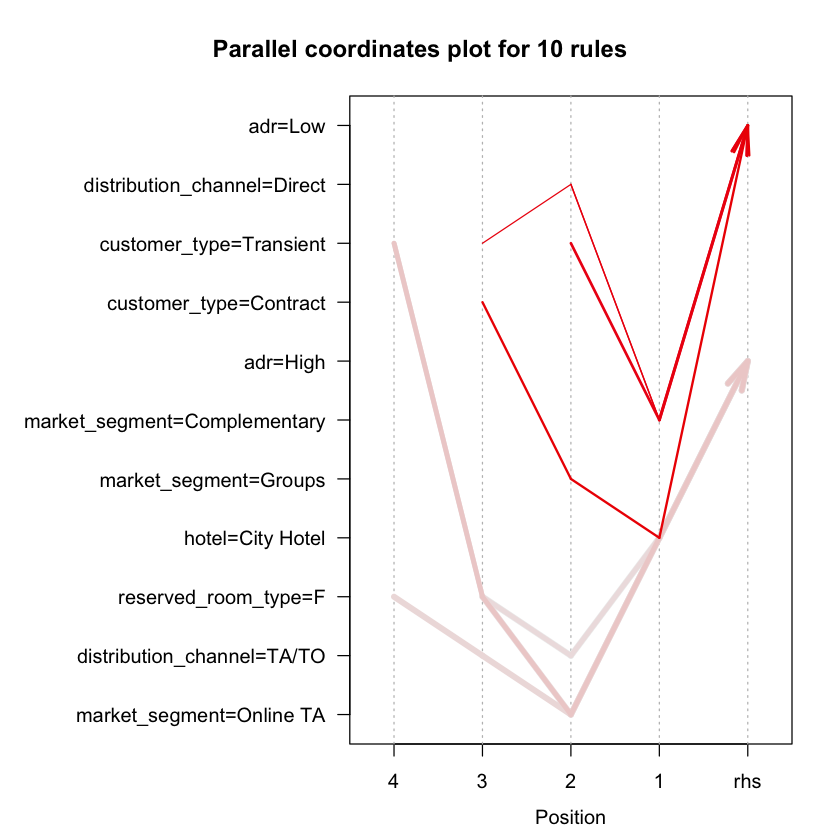

In [62]:
rules <- apriori(trans,parameter=list(minlen=2,maxlen=5, support=.005, confidence=.7), control = list(verbose=F),appearance = list(rhs=c("adr=Low","adr=Medium","adr=High"), lhs=c("market_segment=Aviation","market_segment=Complementary", "market_segment=Corporate", "market_segment=Direct", "market_segment=Groups", "market_segment=Offline TA/TO", "market_segment=Online TA", "customer_type=Contract", "customer_type=Group", "customer_type=Transient","customer_type=Transient-Party","reserved_room_type=A","reserved_room_type=B","reserved_room_type=C","reserved_room_type=D","reserved_room_type=E","reserved_room_type=F", "reserved_room_type=G", "reserved_room_type=H", "reserved_room_type=L", "reserved_room_type=P", "distribution_channel=Corporate","distribution_channel=Direct", "distribution_channel=GDS", "distribution_channel=TA/TO", "hotel=Resort Hotel","hotel=City Hotel"),default="none"))
                                                                                                        
rules_lift <- sort(rules, by="lift")
rules_pruned <- rules_lift[!is.redundant(rules_lift, measure="lift")]
rules_pruned <- rules_pruned[quality(rules_pruned)$lift > 2.5]

# Top 10 rules
top10Rules <- head(rules_pruned, n = 10, by = "confidence")
summary(rules_pruned)
inspect(rules_pruned, by="lift")


# Plots
plot(rules_pruned, method="two-key plot") # The two-key plot uses support and confidence on x and y-axis respectively. It uses order for coloring. The order is the number of items in the rule.
plot(rules_pruned, method="grouped matrix")
plot(top10Rules, method="paracoord", control = list(reorder = TRUE)) # Top 10 rules are used

### `Recommendations based on the exceptional work`

#### Rules for LHS(Cancelled booking) vs RHS(customer_type - Transient Party(Family, friends))

- It is recommended that the hotel staffs proactively reach out the people hosting the family and friends oriented events to get an idea on where they stand with their scheduling. Since the lead time is high, there might be a lot of variables that could happen along the way during the preparation. It is imperative to stay on top of their event scheduling. 

#### Rules for LHS(Cancelled bookings) vs RHS(customer_type - Contract (Company or Government))

- It is noted that the majority of the bookings are business related. It will be beneficial for the hotel to provide small rooms to those business travelers and save bigger rooms for bigger party. Those rules that are applicable to each item with the high lift where the product recommended has a high margin should be considered.It can drive the significant uplift in profit.
    
#### Rules for LHS(Reservation type) vs RHS(ADR)

- Looking at the factors that contribute to higher ADR, it is recommended that the customers establish direct communication channel with the hotel instead of working with travel agency to avoid the high ADR.  
- From the hotel perspective, it is recommended to reach out the customers who have those items associated with low ADR and proactively communicate with them to make sure their bookings are on schedule. One proactive measure our group recommends after taking this into consideration is that the hotel staff at a city hotel reach out to these groups if their expected arrival date is abnormally far out and make sure their bookings are canceled in order to prevent overbooking and also to increase profitability by getting rid of bookings with low ADR and fill in more with those with higher ADR. 
